# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('dataframedummy.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  bool   
 9   sexo_M                                  16650 non-null  int64  
 10  posse_de_veiculo_Y                      16650 non-null  in

In [ ]:
df['mau'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [6]:
# variáveis explicativas:
X = df.drop(columns = 'mau')

# variáveis resposta:
y = df.mau

# separando a base em 70% para treino e 30% para teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

**Seguindo as instruções do site sobre o tipo de dado e quantidade, conseguimos alcançar uma acurácia de 97.8% com o modelo nos dados de teste.**

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [15]:
# 1) Defina um objeto com a função da árvore de decisão vista na aula

clf = tree.DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [16]:
# 2) Treine o modelo com os dados que você separou para treinamento

clf = clf.fit(X = X_train, y = y_train)
clf

DecisionTreeClassifier(random_state=100)

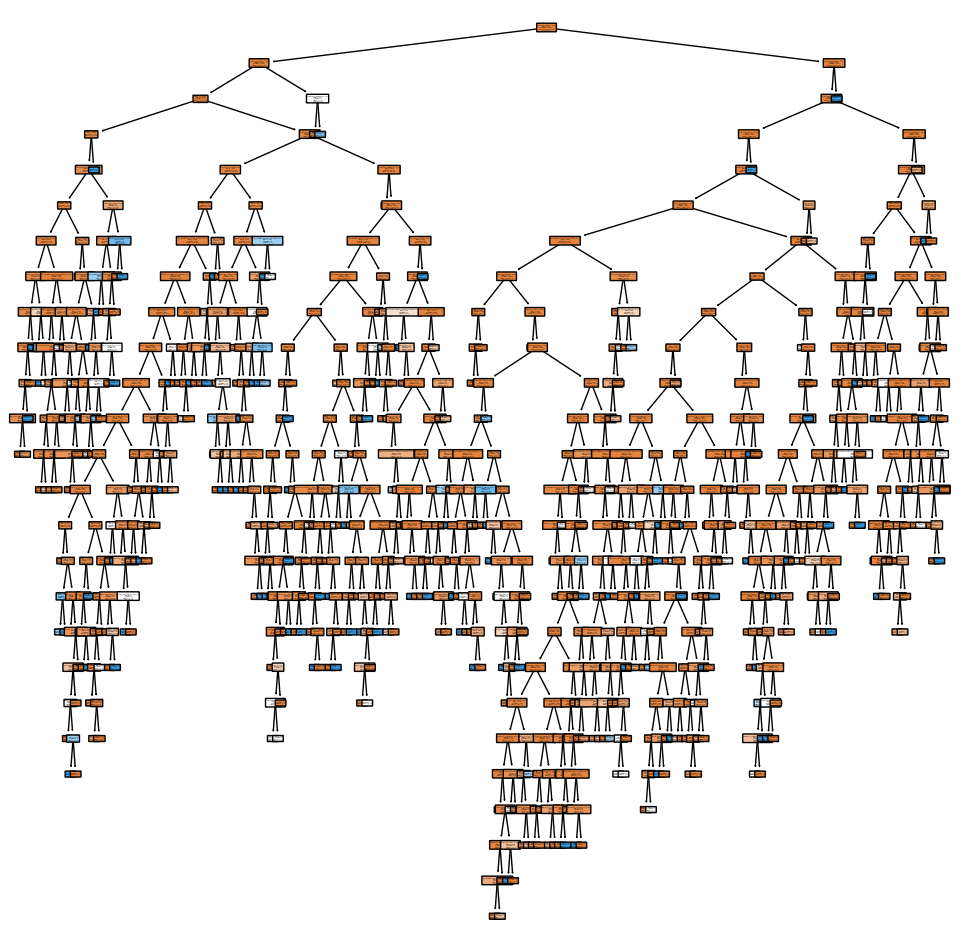

In [21]:
# 3) Visualiza a árvore de decisão. Talvez você queira aumentar um pouco a figura

plt.figure(figsize = (12,12))
plot_tree(decision_tree=clf,
         feature_names=X_train.columns.tolist(),
         class_names=['bons', 'maus'],
         filled = True,
         rounded=True)

plt.show()

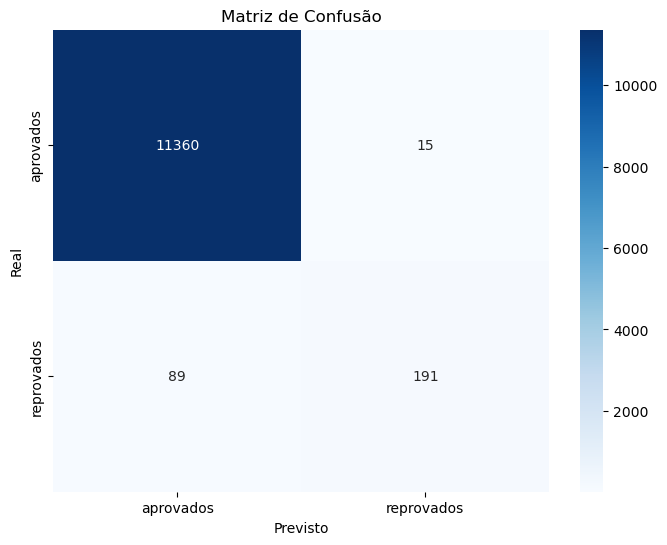

In [61]:
# 4) Produza uma visualização da matriz de classificação (ou matriz de confusão) - 
#    coloque os rótulos como "aprovados" e "reprovados" - 
#    pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

# Prever os rótulos para os dados de teste
y_pred = clf.predict(X_train)

# Calcular a matriz de confusão
cm = confusion_matrix(y_train, y_pred)

# Definir os rótulos das classes
class_names = ['aprovados', 'reprovados']

# Plotar a matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão');

In [52]:
# 5) Calcule a acurácia na base de treinamento.

print('Acurrácia na base de treinamento:')
predict_train = clf.predict(X_train)
accuracy_score(y_true = y_train,
              y_pred = predict_train)

Acurrácia na base de treinamento:


0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [53]:
# 1) Classifique a base de teste de acordo com a árvore que você treinou no item 2.

predict_test = clf.predict(X_test)

print('Valores preditos:')
print(pd.Series(predict_test).value_counts(), '\n')

print('Valores reais:')
print(y_test.value_counts())

Valores preditos:
False    4903
True       92
Name: count, dtype: int64 

Valores reais:
mau
False    4885
True      110
Name: count, dtype: int64


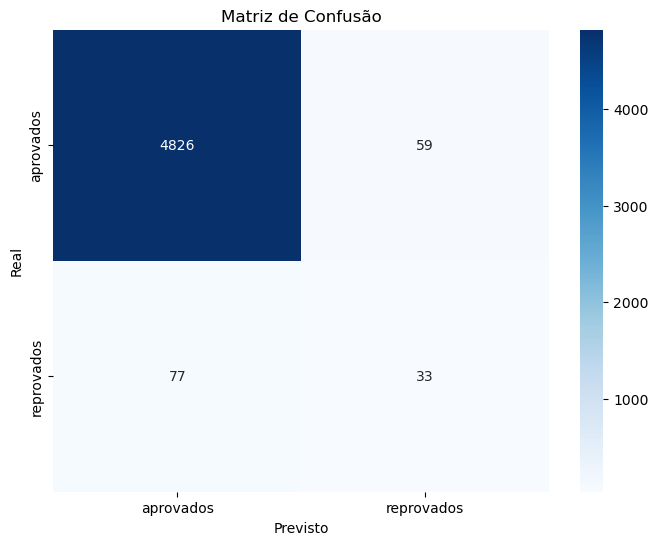

In [66]:
# 2) Produza a visualização da matriz de confusão para a base de teste.
# Prever os rótulos para os dados de teste
y_pred = clf.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definir os rótulos das classes
class_names = ['aprovados', 'reprovados']

# Plotar a matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão');

In [68]:
# 3) Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

print('Acurácia da base de teste:', 
      accuracy_score(y_true=y_test, 
                     y_pred=predict_test), '\n')

print('Acurácia da base de treinamento:', 
      accuracy_score(y_true=y_train, 
                     y_pred=predict_train))

Acurácia da base de teste: 0.9727727727727727 

Acurácia da base de treinamento: 0.991076791076791


In [69]:
# 4) Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
#    Use o random_state = 123. Avalie a matriz de classificação. 
#    Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

nova_clf = DecisionTreeClassifier(max_depth=10, 
                                  min_samples_leaf=5, 
                                  random_state=123)
nova_clf = nova_clf.fit(X=X_train, 
                        y=y_train)

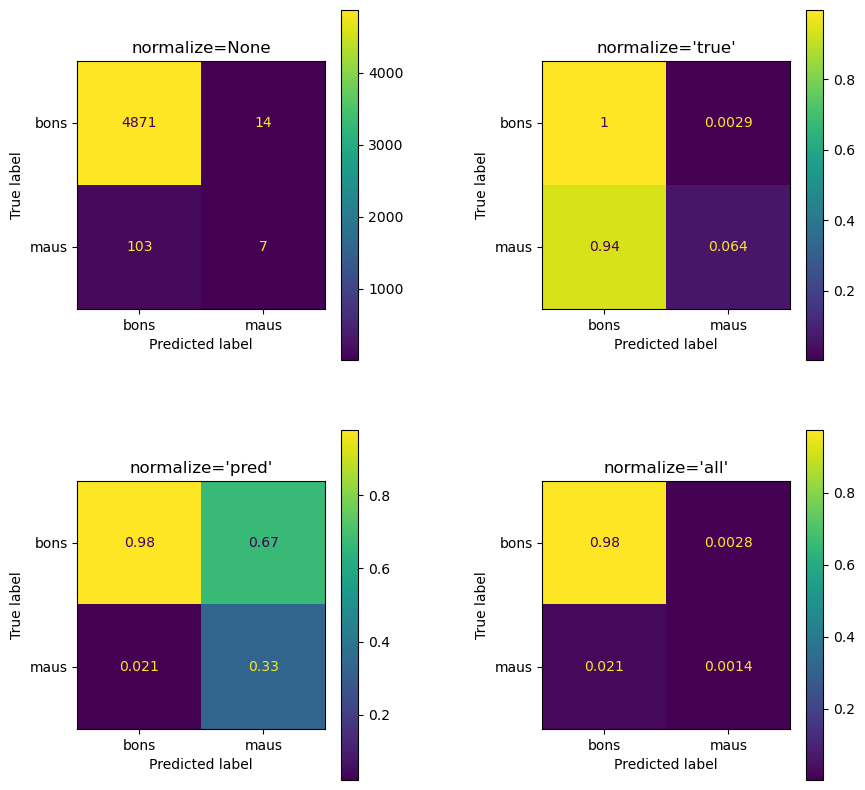

In [70]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=2, 
                         figsize=(10,10))
fig.subplots_adjust(wspace=0.5)

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize=None, 
                                      ax=axes[0,0])
axes[0,0].set_title(label="normalize=None")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='true', 
                                      ax=axes[0,1])
axes[0,1].set_title(label="normalize='true'")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='pred', 
                                      ax=axes[1,0])
axes[1,0].set_title(label="normalize='pred'")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='all', 
                                      ax=axes[1,1])
axes[1,1].set_title(label="normalize='all'")

plt.show()

In [71]:
print("Proporção de proponentes classificados como 'maus':",
      round(7/(1937+87+7)*100, 2), 
      '%')

Proporção de proponentes classificados como 'maus': 0.34 %


In [72]:
# 5) Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

print("Valores reais:")
print(pd.Series(y_test).value_counts(), 
      '\n')

print("Todos os contratos da base teste classificados como 'bons':")
print(pd.Series(y_test.replace(to_replace=True, 
                               value=False)
               ).value_counts(), 
      '\n')

print('Acurácia:', 
      round(accuracy_score(y_true=y_test, 
                           y_pred=y_test.replace(to_replace=True, 
                                                 value=False)
                          ) * 100,
            2), 
      '%')

Valores reais:
mau
False    4885
True      110
Name: count, dtype: int64 

Todos os contratos da base teste classificados como 'bons':
mau
False    4995
Name: count, dtype: int64 

Acurácia: 97.8 %
